In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

In [22]:

df = pd.read_csv("Netflix Dataset 1 (2).csv")



In [23]:
print("Shape of dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nMissing Values per column:\n", df.isnull().sum())
display(df.head())

Shape of dataset: (7789, 11)

Column Names: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Missing Values per column:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [24]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Country'].fillna('Unknown', inplace=True)
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)
df.drop_duplicates(inplace=True)

/tmp/ipython-input-202861224.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-202861224.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [25]:
df['Year'] = df['Release_Date'].dt.year
df['Month'] = df['Release_Date'].dt.month

print("\n✅ Data Cleaned Successfully!\n")
display(df.info())


✅ Data Cleaned Successfully!

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7787 non-null   object        
 1   Category      7787 non-null   object        
 2   Title         7787 non-null   object        
 3   Director      7787 non-null   object        
 4   Cast          7787 non-null   object        
 5   Country       7787 non-null   object        
 6   Release_Date  7689 non-null   datetime64[ns]
 7   Rating        7780 non-null   object        
 8   Duration      7787 non-null   object        
 9   Type          7787 non-null   object        
 10  Description   7787 non-null   object        
 11  Year          7689 non-null   float64       
 12  Month         7689 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 851.7+ KB


None

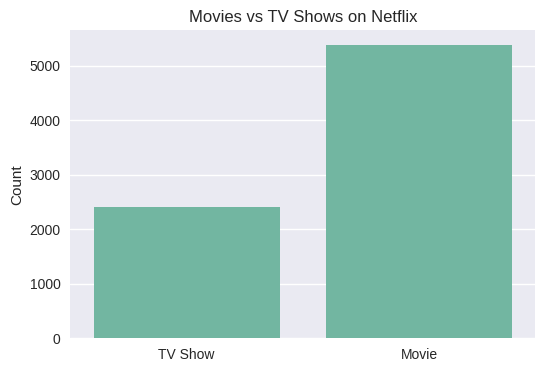

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=df)
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2493819811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


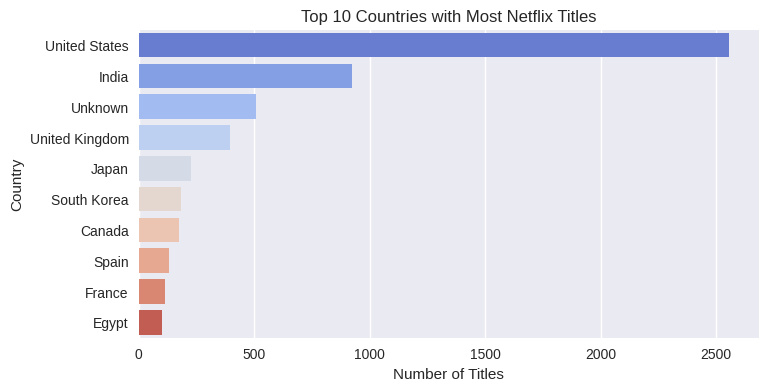

In [27]:
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

/tmp/ipython-input-2697624214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index, palette='Set3')


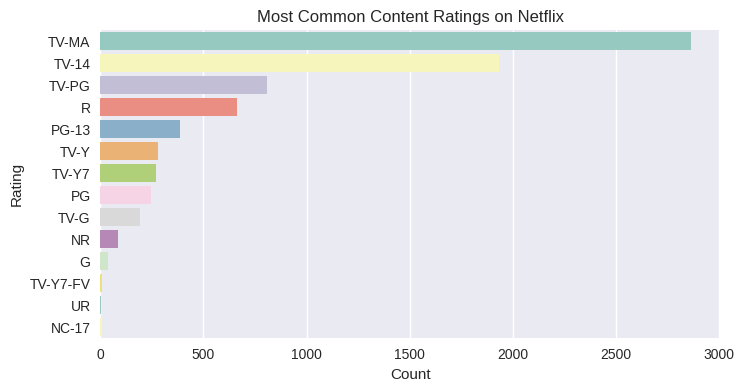

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index, palette='Set3')
plt.title('Most Common Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

/tmp/ipython-input-3626928920.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='magma')


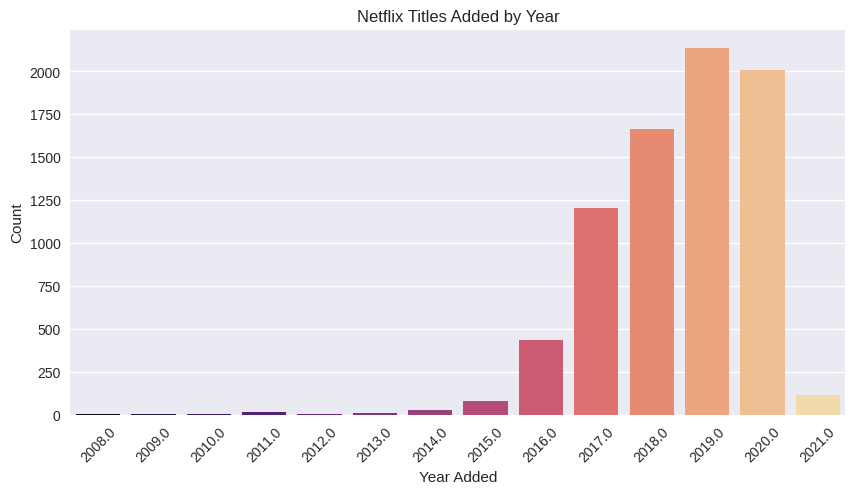

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='Year', data=df, palette='magma')
plt.title('Netflix Titles Added by Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1900852620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')


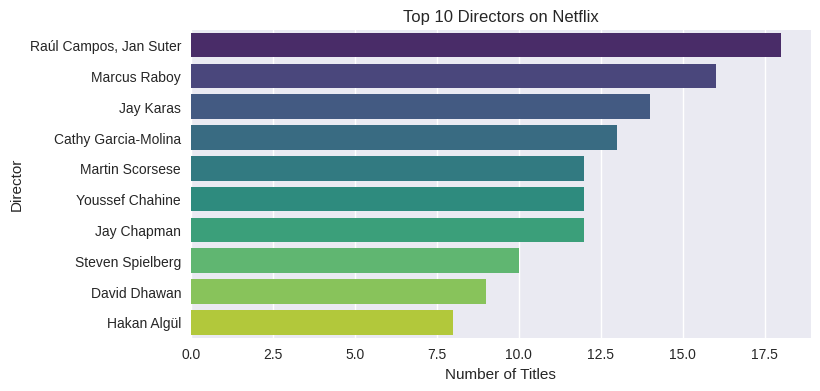

In [30]:
top_directors = df[df['Director'] != 'Unknown']['Director'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

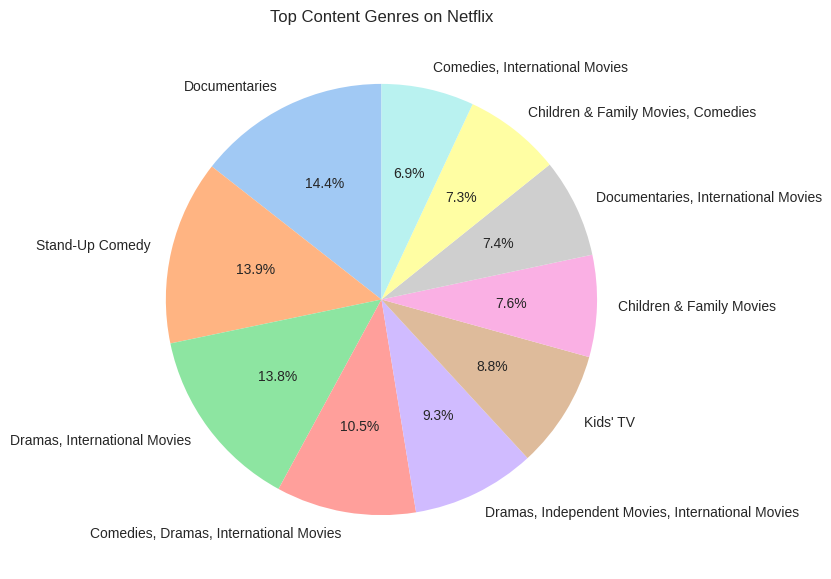

In [31]:
top_genres = df['Type'].value_counts().head(10)
plt.figure(figsize=(7,7))
plt.pie(top_genres.values, labels=top_genres.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top Content Genres on Netflix')
plt.show()

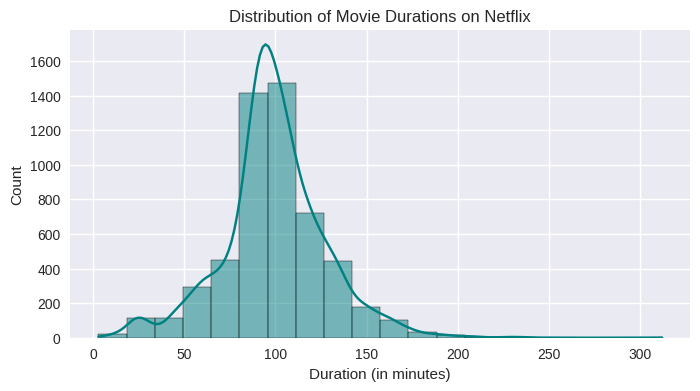

In [32]:
movies = df[df['Category'] == 'Movie'].copy()
movies['Minutes'] = movies['Duration'].str.replace(' min', '').str.replace('min', '').astype(float)
plt.figure(figsize=(8,4))
sns.histplot(movies['Minutes'].dropna(), bins=20, kde=True, color='teal')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2773260738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='cool')


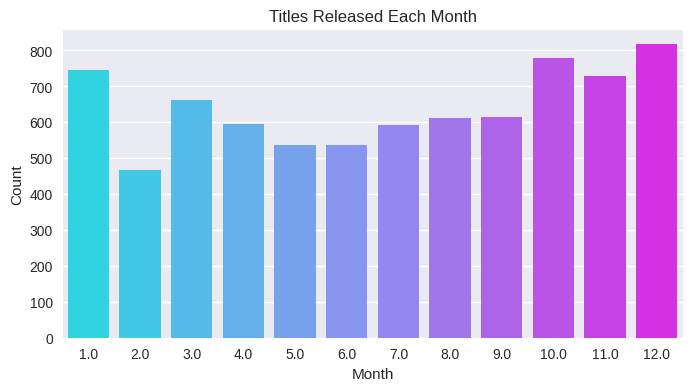

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(x='Month', data=df, palette='cool')
plt.title('Titles Released Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

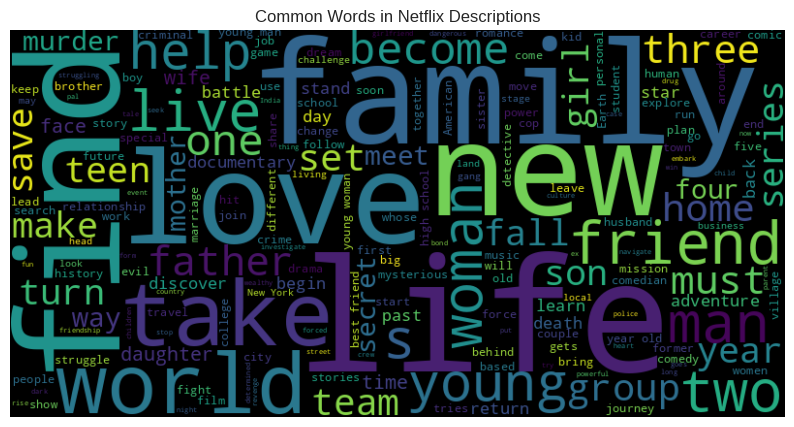

In [34]:
text = ' '.join(df['Description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Netflix Descriptions')
plt.show()

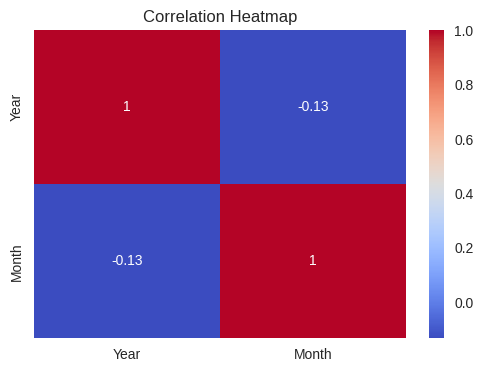

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
print("""
✅ Insights Summary:

Netflix hosts both Movies and TV Shows, with Movies being more common.

The United States and India produce the most content.

Popular ratings are TV-MA, TV-14, and PG-13.

Content growth accelerated significantly after 2015.

A few directors have multiple titles on Netflix.

Average movie duration is about 90–100 minutes.

Frequent themes include love, life, adventure, and crime.
""")


✅ Insights Summary:

Netflix hosts both Movies and TV Shows, with Movies being more common.

The United States and India produce the most content.

Popular ratings are TV-MA, TV-14, and PG-13.

Content growth accelerated significantly after 2015.

A few directors have multiple titles on Netflix.

Average movie duration is about 90–100 minutes.

Frequent themes include love, life, adventure, and crime.

